<!--HEADER-->
*Notas de aula de Modelagem Matemática - 2021/1 [- Ricardo M. S. Rosa (IM/UFRJ)](http://www.im.ufrj.br/rrosa)*

<!--BADGES-->
<a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2021p1/notas_de_aula/05.01-Erros_e_incertezas.ipynb" target="_blank"><img align="left" src="https://img.shields.io/badge/view%20in-nbviewer-orange" alt="View in NBViewer" title="View in NBViewer"></a><a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/julia-env-for-binder-2021p1?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Frmsrosa%252Fmodelagem_matematica%26branch%3Dmodmat2021p1%26urlpath%3Dtree%252Fmodelagem_matematica%252Fnotas_de_aula/05.01-Erros_e_incertezas.ipynb" target="_blank"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open in binder"></a><a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2021p1/notas_de_aula/slides/05.01-Erros_e_incertezas.slides.html" target="_blank"><img align="left" src="https://img.shields.io/badge/view-slides-darkgreen" alt="View Slides" title="View Slides"></a>&nbsp;

<!--NAVIGATOR-->
[<- 5. Erros, incertezas](05.00-Erros_incertezas_quantificacao.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) | [5.2. Mínimos quadrados, maximização da verossimilhança e quantificação de incertezas em regressões lineares ->](05.02-Minimos_quadrados_verossimilhanca.ipynb)

---


# Erros e incertezas

* Na prática, qualquer medição está sujeita a erros e incertezas.

* Como podemos estimar esses fatores?

* Qual a consequência desses fatores numa modelagem?

* Qual o grau de incerteza que isso acarreta num modelo?

In [1]:
using Distributions
using Plots
using Random

### Os conceitos de erro e incerteza

* É importante deixar clara a diferença entre esses dois conceitos.

* O **erro** é a diferença entre o valor de uma medição e o valor exato da quantitade que queremos medir.

* A **incerteza** é uma quantificação da dúvida que temos sobre a medida feita.

* Podemos saber, por exemplo, que um determinado termômetro está descalibrado e mede sempre dois grau acima do padrão e podemos corrigir esse erro.

* Mas qualquer erro sobre o qual não sabemos a medida é uma fonte de incerteza.

### Representando incertezas em medições

* É comum representarmos a incerteza na medição de uma quantidade $q$ na forma
$$ q = \bar q \pm \Delta q.
$$

* Isso é resultado de uma série de medidas, de onde obtemos o **valor médio** $\bar q$ e uma **margem de confiança** $\Delta q$.

* A margem de confiança nos dá um **intervalo de confiança**
$$ [\bar q - \Delta q, \bar q + \Delta q].
$$

* Associado a isso, temos, ainda, o **nível de confiança** associado a esse intervalo.

* Dependendo da distribuição de probabilidade que consideramos em relação à incerteza nas medições, o intervalo de incerteza pode não ser simétrico em relação à média.

* Mais geralmente, podemos considerar $\Delta q$ como uma variável aleatória, com média zero, representando a incerteza em relação ao valor médio $\bar q$.

* Vale ressaltar, no entanto, que, em alguns casos, o intervalo de "erro" exibido em alguns gráficos pode, simplesmente, ser em termos do desvio padrão.

### Informações das medições

* Essas informações são obtidas através de uma série de $N$ medições
$$ q_1, q_2, \ldots, q_N.
$$

* Delas, podemos tirar o valor médio
$$ \bar q = \frac{q_1 + \ldots + q_N}{N}.
$$

* Assim como a variância e o desvio padrão, mas, nesse caso, costumamos considerar o **desvio padrão corrigido** (observe a divisão por $N-1$, ao invés de $N$)
$$ s_q = \sqrt{\frac{1}{N-1}\sum_{i=1}^N (q_i - \bar q)^2}.
$$

* O desvio padrão corrigido é importante para a estimativa do intervalo e do nível de confiança, que veremos mais pra frente.

### A probabilidade por detrás da incerteza

* A distribuição de probabilidades da incerteza é desconhecida.

* Os dados $q_i, \ldots, q_N$ nos dão apenas uma visão parcial desta distribuição.

* Quanto mais dados, melhor, mas nunca saberemos exatamente essa distribuição.

* De qualquer forma, dada uma distribuição de probabilidades $\mathcal{P}$ e interpretando $q$ como variável aleatória associada a $\mathcal{P}$, podemos falar da **média**, ou **valor esperado**, de $q$ e denotá-la por
$$ E(q).
$$

* A **variância** e o **desvio padrão** são denotados por $\operatorname{Var}(q)$ e $\sigma$.

* Não custa ressaltar que a média $\mu$ da distribuição de probabilidades desconhecida pode ser, e geralmente é, diferente da média $\bar q$ da "pequena" amostra que temos.

### Média, variância e desvio padrão

* Se, mais precisamente, o espaço da distribuição é $X$ e a medidade de probabilidade é $\rho$, então a *média*, a *variância* e o *desvio padrão* são dados por
$$ \mu = E(q) = \int_X q\;d\rho(q), \quad \operatorname{Var}(q) = E((q-\mu)^2) = \int_X (q - \mu))^2 \;d\rho(q), \quad \sigma = \sqrt{\operatorname{Var}(q)}.
$$

* Se o espaço de probabilidades $X$ é um subconjunto de $\mathbb{R^n}$ e $f=f(q)$ é a distribuição de probabilidades de $\mathcal{P}$, então também podemos escrever
$$ \mu = E(q) = \int_X q f(q)\;dq, \quad \operatorname{Var}(q) = E((q-\mu)^2) = \int_X (q - \mu)^2f(q) \;dq, \quad \sigma = \sqrt{\operatorname{Var}(q)}.
$$

### Intervalo de confiança

* A ideia é termos uma estimativa de um intervalo de confiança em torno da média $\bar q$ que nos dê, de acordo com um nível pré-definido de confiança, a probabilidade de que a média "real" $E(q)$ esteja nesse intervalo.

* Esse intervalo **não** é a probabilidade do conjunto de dados estar no intervalo. Ela diz respeito à localização da média $E(q)$. É muito importante ressaltar isso.

* Essa estimativa é dada pelo **erro padrão da amostra**
$$ \Delta q = \frac{s_q}{\sqrt{N}}.
$$

* A relação disso com a intervalo e nível de confiança é estabelecida pelo **Teorema do Limite Central**.

### Visualizando intervalos de confiança

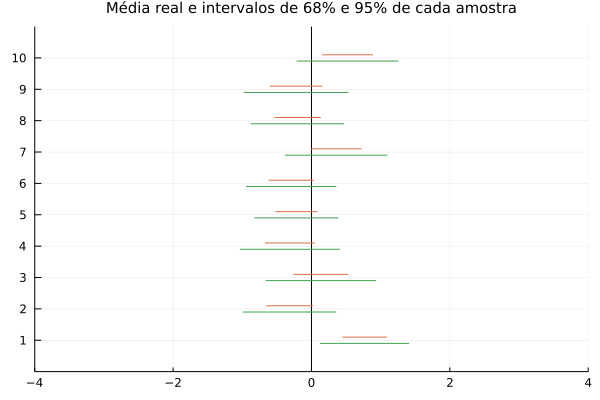

In [2]:
N = 10
M = 10
Random.seed!(1100)
amostras = rand(Normal(), M, N)
vline([0.0], xlims=(-4,4), ylims=(0,M+1), yticks=1:M, label=false, titlefont=10,
    color=:black, title="Média real e intervalos de 68% e 95% de cada amostra")
for j = 1:M
    q̄ = mean(amostras[j,:])
    Δ_q = std(amostras[j,:])/√(N-1)
    plot!([q̄-Δ_q, q̄+Δ_q], [j+0.1, j+0.1], label=false, color=2)
    plot!([q̄-2Δ_q, q̄+2Δ_q], [j-0.1, j-0.1], label=false, color=3)
end
plot!()

### O Teorema do Limite Central

* Considere uma distribuição de probabilidades qualquer, como na situação descrita anteriormente.

* Suponha que retiremos uma coleção de amostras a partir dessa distribuição, com cada amostra contendo $N$ dados cada, com as amostras e os dados escolhidos de forma aleatória e independente.

* Tome a média aritmética de cada uma dessas amostras, que denotamos, aqui, por $\bar q_N$, para explicitar a dependência em $N$.

* Então, o **Teorema do Limite Central** garante que 

> A distribuição de probabilidades dessas médias $\bar q_N$ se aproxima de uma normal, conforme $N$ aumenta.

### Mais precisamente

* Sejam $\mu$ e $\sigma$ a média e o desvio padrão da distribuição de probabilidades desconhecida $\mathcal{P}$.

* Seja $\mathcal{Q}_N$ a distribuição de probabilidades das médias das amostras.

* Então, temos a convergência (em probabilidade e quase sempre)
$$ \sqrt{N}(\mathcal{Q}_N - \mu) \rightarrow \mathcal{N}(0,\sigma^2).
$$

* Isso significa que a distribuição de probabilidades $\mathcal{S}_N$ das médias $\bar q_N$ está cada vez mais próxima de uma normal com média $\mu$ e desvio padrão $\sigma/\sqrt{N}$, i.e. 
$$ \mathcal{Q}_N \sim \mathcal{N}\left(\mu,\frac{\sigma^2}{N}\right).
$$

* Observe que esse desvio padrão $\sigma/\sqrt{N}$ é semelhante ao erro $\Delta q_N$ que mencionamos acima.

### Aproximação prática e a correção de Bessel

* No caso de $N$ ser "grande o suficiente", o desvio padrão $\sigma/\sqrt{N}$ é relativamente pequeno e há grande chance de uma amostra arbitrária ter média $\bar q_N$ muito próxima de $\mu$ e desvio padrão (sem correção) $\sigma_N$ próximo de $\sigma$.

* Nesse caso, é natural pensarmos em usar a aproximação
$$ \mathcal{Q}_N \sim \mathcal{N}\left(\bar q_N,\frac{\sigma_N^2}{N}\right).
$$

* O desvio padrão não corrigido $\sigma_N$ tende a estimar por por baixo o desvio padrão $\sigma$, a menos que $\bar q_N$ coincida com $\mu$.

* Esta correção é conhecida como **correção de Bessel**. Veja mais informações sobre isso em [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction).

* A correção de Bessel evita essa distorção tendenciosa, o que nos leva a uma aproximação melhor pela normal com desvio padrão dado pelo erro padrão da amostra:
$$ \mathcal{Q}_N \sim \mathcal{N}\left(\bar q_N, \Delta q_N \right).
$$

* Associado a isso, temos, também, uma certa redundância no uso do desvio padrão não corrigido da amostra, já que podemos encontrar o valor de uma das amostras a partir da média e das $N-1$ amostras restantes.

* Ou seja, conhecendo-se $\bar q_N$, o conjunto $q_1 - \bar q_N, \ldots, q_N-\bar q_N$ possui apenas $N-1$ graus de liberdade.

### Interlúdio sobre a distribuição normal

* Uma normal $\mathcal{N}(\mu, \sigma^2)$ é uma distribuição caracterizada por uma média $\mu$ e um desvio padrão $\sigma$ e associada à função densidade de probabilidades
$$ f_{\mu, \sigma^2}(q) = \frac{1}{\displaystyle \sqrt{2\pi \sigma^2}}e^{\displaystyle -\frac{(q-\mu)^2}{2\sigma^2}}.
$$

* O desvio padrão nos dá uma ideia da "dispersão" dos dados retirados aleatoriamente a partir dessa distribuição.

* O intervalo $I_{68\%} = [\mu - \sigma, \mu + \sigma]$ tem medida de probabilidade de 68\% (aproximadamente). Ou seja, esperamos que 68\% dos dados da amostra estejam dentro desse intervalo.

* E o intervalo $I_{95\%} = [\mu - 2\sigma, \mu + 2\sigma]$ corresponde a 95\% de probabilidade (aproximadamente).

* São esses intervalos de probabilidade que nos darão os intervalos de confiança, quando devidamente interpretados e aplicados nas informações retiradas dos dados.

In [3]:
intervalos = Dict("68%" => [0.16, 0.84], "95%" => [0.025, 0.975], "99%" => [0.005, 0.995])
for (k, int) in intervalos
    println("Normal IC $k: ", round.(quantile.(Normal(), int), digits=3))
end
println()
for α in (1,2,3)
    println("Nível de onfiança em [μ-$(α)σ, μ+$(α)σ]: ", round(100*(cdf(Normal(), α) - cdf(Normal(), -α)), digits=2), "%")
end

Normal IC 68%: [-0.994, 0.994]
Normal IC 95%: [-1.96, 1.96]
Normal IC 99%: [-2.576, 2.576]

Nível de onfiança em [μ-1σ, μ+1σ]: 68.27%
Nível de onfiança em [μ-2σ, μ+2σ]: 95.45%
Nível de onfiança em [μ-3σ, μ+3σ]: 99.73%


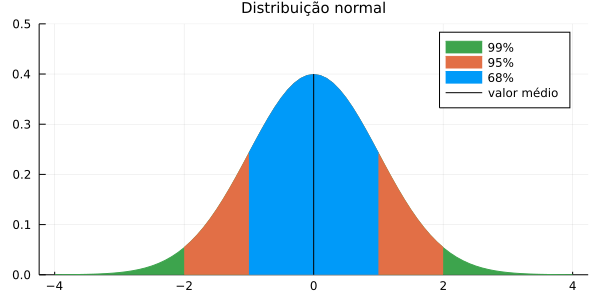

In [4]:
plot(-4:0.1:4, x -> pdf(Normal(), x),fill=true, color=3, ylims = (0,0.5),
    label = "99%", title="Distribuição normal", titlefont=10, size=(600,300))
plot!(-2.0:0.1:2.0, x -> pdf(Normal(), x), fill=true, color=2, label="95%")
plot!(-1.0:0.1:1.0, x -> pdf(Normal(), x), fill=true, color=1, label="68%")
plot!([(0.0, 0.0), (0.0, 0.4)], color=:black, label="valor médio")

### Supondo distribuição das médias amostrais como sendo uma normal

* Supondo, então, que $\mathcal{Q}_N$, que converge para $\mathcal{N}(\mu,\sigma^2/N)$, seja bem aproximado pela normal $\mathcal{N}(\bar q_N, \Delta q_N)$, como indicado acima, temos os intervalos de $68\%$ e $95\%$ de probabilidade dados por
$$ I_{68\%} = \left[q_N - \Delta q_N, \bar q_N + \Delta q_N\right], \qquad I_{95\%} = \left[\bar q_N - 2\Delta q_N, \;\bar q_N + 2\Delta q_N\right]
$$

* Esses intervalos estão associados à porcentagem de amostras baseadas nessa normal estaram em cada intervalo.

* Mas, baseado no Teorema do Limite Central, vamos interpretá-los como intervalos de confiança para a localização da média "real" da probabilidade desconhecida.

* De fato, se 
$$\bar q_N \in \left[\mu - \sigma/\sqrt{N}, \mu + \sigma/\sqrt{N}\right],
$$
com 68\% de probabilidade e 
$$\sigma/\sqrt{N} \approx \Delta q_N,
$$
então, equivalentemente,
$$\mu \in  I_{68\%} = \left[q_N - \Delta q_N, \bar q_N + \Delta q_N\right]
$$
com 68\% de probabilidade.

* Analogamente para o intervalo de 95\% e outros de diferentes níveis.

### Visualizando essa convergência

* Vamos visualizar tanto a convergência dos parâmetros, através dos intervalos de confiança de determinadas amostras.

* Como do histograma das amostras.

In [5]:
Random.seed!(1100)
N = 10
amostra = rand(Normal(), N)
q̄ = mean(amostra)
Δ_q = std(amostra)/√(N-1)
nothing

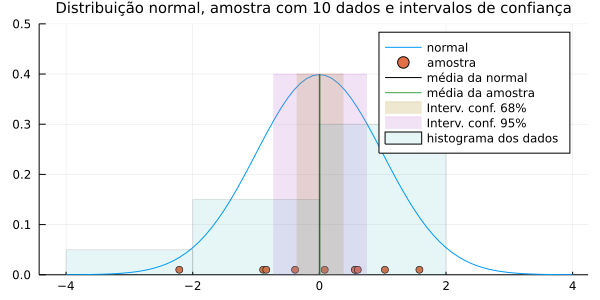

In [6]:
plot(-4.0:0.1:4.0, x -> pdf(Normal(), x), color=1, ylims=(0.0,0.5),
    label = "normal", title="Distribuição normal, amostra com $N dados e intervalos de confiança",
    titlefont=10, size=(600,300))
scatter!(amostra, fill(0.01, length(amostra)), label="amostra", color=2)
plot!([(0.0, 0.0), (0.0, 0.4)], color=:black, label="média da normal")
plot!([(mean(amostra), 0.0), (mean(amostra), 0.4)], color=3, label="média da amostra")
plot!([q̄ - Δ_q, q̄ + Δ_q], [0.4, 0.4], fill=true, alpha=0.2, color=5, label="Interv. conf. 68%")
plot!([q̄ - 2Δ_q, q̄ + 2Δ_q], [0.4, 0.4], fill=true, alpha=0.2, color=4, label="Interv. conf. 95%")
histogram!(amostra, nbins=div(N,4), normed=true, alpha=0.1, color=6, label="histograma dos dados")

In [7]:
Random.seed!(1101)
N = 30
amostra = rand(Normal(), N)
q̄ = mean(amostra)
Δ_q = std(amostra)/√(N-1)
nothing

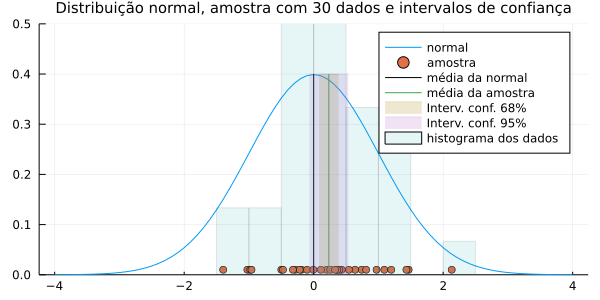

In [8]:
plot(-4.0:0.1:4.0, x -> pdf(Normal(), x), color=1, ylims=(0.0,0.5),
    label = "normal", title="Distribuição normal, amostra com $N dados e intervalos de confiança",
    titlefont=10, size=(600,300))
scatter!(amostra, fill(0.01, length(amostra)), label="amostra", color=2)
plot!([(0.0, 0.0), (0.0, 0.4)], color=:black, label="média da normal")
plot!([(mean(amostra), 0.0), (mean(amostra), 0.4)], color=3, label="média da amostra")
plot!([q̄ - Δ_q, q̄ + Δ_q], [0.4, 0.4], fill=true, alpha=0.2, color=5, label="Interv. conf. 68%")
plot!([q̄ - 2Δ_q, q̄ + 2Δ_q], [0.4, 0.4], fill=true, alpha=0.2, color=4, label="Interv. conf. 95%")
histogram!(amostra, nbins=div(N,4), normed=true, alpha=0.1, color=6, label="histograma dos dados")

In [9]:
Random.seed!(1102)
N = 80
amostra = rand(Normal(), N)
q̄ = mean(amostra)
Δ_q = std(amostra)/√(N-1)
nothing

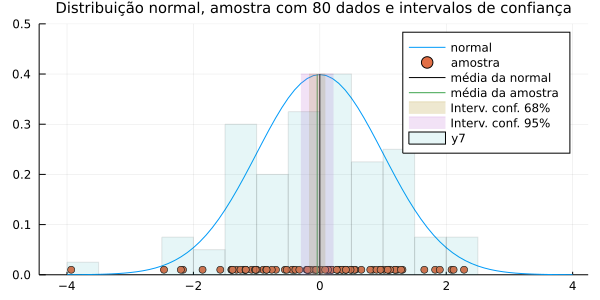

In [10]:
plot(-4:0.1:4, x -> pdf(Normal(), x), color=1, ylims=(0.0,0.5),
    label = "normal", title="Distribuição normal, amostra com $N dados e intervalos de confiança",
    titlefont=10, size=(600,300))
scatter!(amostra, fill(0.01, length(amostra)), label="amostra", color=2)
plot!([(0.0, 0.0), (0.0, 0.4)], color=:black, label="média da normal")
plot!([(mean(amostra), 0.0), (mean(amostra), 0.4)], color=3, label="média da amostra")
plot!([q̄ - Δ_q, q̄ + Δ_q], [0.4, 0.4], fill=true, alpha=0.2, color=5, label="Interv. conf. 68%")
plot!([q̄ - 2Δ_q, q̄ + 2Δ_q], [0.4, 0.4], fill=true, alpha=0.2, color=4, label="Interv. conf. 95%")
histogram!(amostra, nbins=div(N,4), normed=true, alpha=0.1, color=6)

In [11]:
N = 10
M = 20
Random.seed!(1103)
amostras = rand(Normal(), M, N)

20×10 Matrix{Float64}:
 -0.0294387    0.694338   -0.362426    0.0446286  …   1.09673      -0.720378
  0.529993    -1.20921    -1.48575    -1.61215        0.307271      1.13819
 -0.278231    -0.2576      0.917575   -0.169753      -0.290661     -0.992843
  0.715864     0.741861   -1.06756    -1.2639         1.50578      -1.72246
 -1.79432     -1.08636    -0.0334113   0.596747       0.607741     -0.0891378
  0.903233    -1.32089    -1.64778     0.110527   …  -0.612291      0.789926
  0.168813     1.26761     0.713787    0.0426698     -1.72336      -0.733414
  0.00836363   0.570689    2.19117    -0.706772      -1.36049       0.17369
  0.15622     -0.223869    0.424892   -0.831931       0.635605      1.11526
  1.52078      1.50055     0.191132    0.0889218     -1.63659       0.300066
  0.520803    -0.603534    0.421082    1.11941    …  -0.000924022   0.300101
 -1.37755     -0.0861224   1.40048    -2.20335       -0.521135     -0.369223
 -0.12132      1.88729     1.65174     0.892836       0.

In [12]:
medias = mean(amostras, dims=2)

20×1 Matrix{Float64}:
 -0.38657338717439665
 -0.3900242902554991
 -0.09795360570748332
  0.037156871796164934
 -0.12319613437853347
 -0.27390983709388983
  0.3194580005676956
  0.11315010067847572
  0.22346263869146235
  0.002657497450463181
  0.11396772858159884
 -0.38047306506190054
  0.3531613272820101
  0.4507541858157559
 -0.03730671788573529
 -0.5698617435926163
 -0.10493830208553674
 -0.343642001536986
 -0.0033278373853233177
  0.05617753704094168

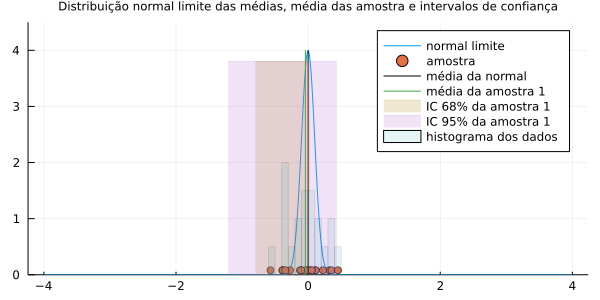

In [13]:
q̄ = mean(amostras[1,:])
Δ_q = std(amostras[1,:])/√(N-1)
plot(-4:0.01:4, x -> pdf(Normal(0.0, 1.0/N), x), color=1, ylims=(0.0,4.5),
    label="normal limite", title="Distribuição normal limite das médias, média das amostra e intervalos de confiança",
    titlefont=8, size=(600,300))
scatter!(medias, fill(0.08, length(medias)), label="amostra", color=2)
plot!([(0.0, 0.0), (0.0, 4.0)], color=:black, label="média da normal")
plot!([(mean(amostra), 0.0), (mean(amostra), 4.0)], color=3, label="média da amostra 1")
plot!([q̄ - Δ_q, q̄ + Δ_q], [3.8, 3.8], fill=true, alpha=0.2, color=5, label="IC 68% da amostra 1")
plot!([q̄ - 2Δ_q, q̄ + 2Δ_q], [3.8, 3.8], fill=true, alpha=0.2, color=4, label="IC 95% da amostra 1")
histogram!(medias, nbins=div(M,2), normed=true, alpha=0.1, color=6, label="histograma dos dados")

### Intervalos de confiança

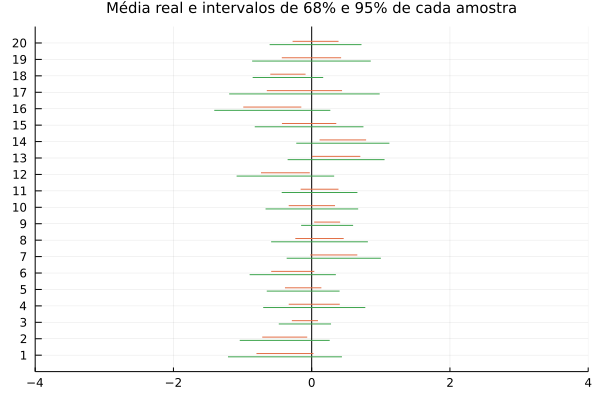

In [14]:
vline([0.0], xlims=(-4,4), ylims=(0,M+1), yticks=1:M, label=false, titlefont=10,
    color=:black, title="Média real e intervalos de 68% e 95% de cada amostra")
for j = 1:M
    q̄ = mean(amostras[j,:])
    Δ_q = std(amostras[j,:])/√(N-1)
    plot!([q̄-Δ_q, q̄+Δ_q], [j+0.1, j+0.1], label=false, color=2)
    plot!([q̄-2Δ_q, q̄+2Δ_q], [j-0.1, j-0.1], label=false, color=3)
end
plot!()

## Exemplos com outras distribuições "escondidas"

* Como visto no Teorema do Limite Central, a distribuição das médias das amostras se aproxima de uma normal, independentemente da distribuição desconhecida.

* Vejamos, então, alguns exemplos com outras distribuições.

### Distribuição desconhecida beta

In [15]:
N = 10
M = 20
distribuicao = Beta(2,5)
intervalo = 0:0.01:1.5
Random.seed!(1102)
amostras = rand(distribuicao, M, N)
medias = mean(amostras, dims=2)
q̄ = mean(amostras[1,:])
Δ_q = std(amostras[1,:])/√(N-1)
nothing

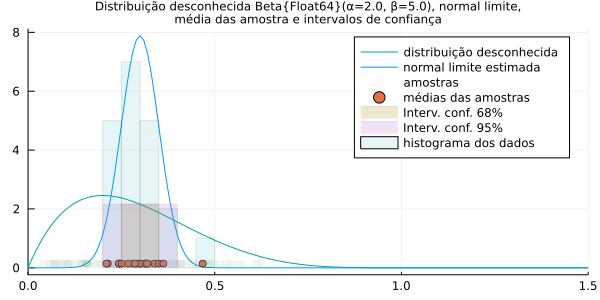

In [16]:
plot(intervalo, x -> pdf(distribuicao, x), color=9, xlims=(minimum(intervalo), maximum(intervalo)),
    label="distribuição desconhecida",
    title="Distribuição desconhecida $distribuicao, normal limite,\nmédia das amostra e intervalos de confiança",
    titlefont=8, size=(600,300))
plot!(intervalo, x -> pdf(Normal(q̄, Δ_q), x), color=1, label="normal limite estimada")
scatter!(reshape(amostras,:,1), fill(pdf(distribuicao,q̄)/15, prod(size(amostras))), label="amostras", color=3, alpha=0.02)
scatter!(medias, fill(pdf(distribuicao,q̄)/15, length(medias)), label="médias das amostras", color=2)
plot!([q̄ - Δ_q, q̄ + Δ_q], pdf.(distribuicao,[q̄,q̄]), fill=true, alpha=0.2, color=5, label="Interv. conf. 68%")
plot!([q̄ - 2Δ_q, q̄ + 2Δ_q], pdf.(distribuicao,[q̄,q̄]), fill=true, alpha=0.2, color=4, label="Interv. conf. 95%")
histogram!(medias, nbins=div(M,2), normed=true, alpha=0.1, color=6, label="histograma dos dados")

### Distribuição desconhecida Chi-square

In [17]:
N = 10
M = 20
distribuicao = Chisq(3)
intervalo = 0:0.01:10
Random.seed!(1102)
amostras = rand(distribuicao, M, N)
medias = mean(amostras, dims=2)
q̄ = mean(amostras[1,:])
Δ_q = std(amostras[1,:])/√(N-1)
nothing

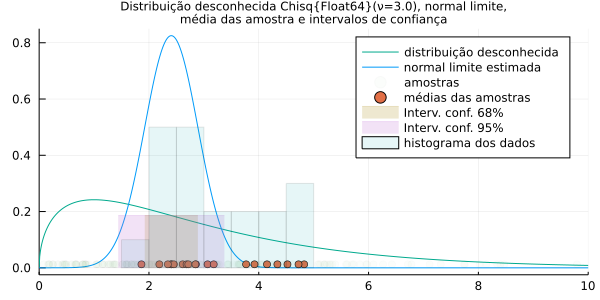

In [18]:
plot(intervalo, x -> pdf(distribuicao, x), color=9, xlims=(minimum(intervalo), maximum(intervalo)),
    label="distribuição desconhecida",
    title="Distribuição desconhecida $distribuicao, normal limite,\nmédia das amostra e intervalos de confiança",
    titlefont=8, size=(600,300))
plot!(intervalo, x -> pdf(Normal(q̄, Δ_q), x), color=1, label="normal limite estimada")
scatter!(reshape(amostras,:,1), fill(pdf(distribuicao,q̄)/15, prod(size(amostras))), label="amostras", color=3, alpha=0.02)
scatter!(medias, fill(pdf(distribuicao,q̄)/15, length(medias)), label="médias das amostras", color=2)
plot!([q̄ - Δ_q, q̄ + Δ_q], pdf.(distribuicao,[q̄,q̄]), fill=true, alpha=0.2, color=5, label="Interv. conf. 68%")
plot!([q̄ - 2Δ_q, q̄ + 2Δ_q], pdf.(distribuicao,[q̄,q̄]), fill=true, alpha=0.2, color=4, label="Interv. conf. 95%")
histogram!(medias, nbins=div(M,2), normed=true, alpha=0.1, color=6, label="histograma dos dados")

### Distribuição desconhecida Arcsine

In [19]:
N = 10
M = 20
distribuicao = Arcsine()
intervalo = 0:0.01:1
Random.seed!(1102)
amostras = rand(distribuicao, M, N)
medias = mean(amostras, dims=2)
q̄ = mean(amostras[1,:])
Δ_q = std(amostras[1,:])/√(N-1)
nothing

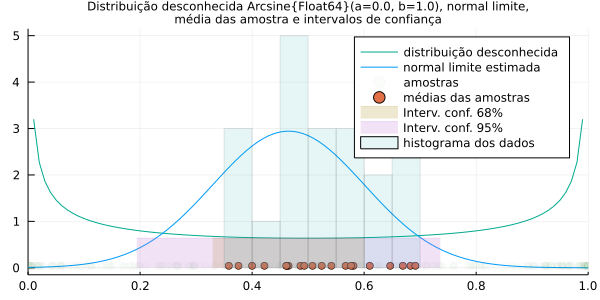

In [20]:
plot(intervalo, x -> pdf(distribuicao, x), color=9, xlims=(minimum(intervalo), maximum(intervalo)),
    label="distribuição desconhecida",
    title="Distribuição desconhecida $distribuicao, normal limite,\nmédia das amostra e intervalos de confiança",
    titlefont=8, size=(600,300))
plot!(intervalo, x -> pdf(Normal(q̄, Δ_q), x), color=1, label="normal limite estimada")
scatter!(reshape(amostras,:,1), fill(pdf(distribuicao,q̄)/15, prod(size(amostras))), label="amostras", color=3, alpha=0.02)
scatter!(medias, fill(pdf(distribuicao,q̄)/15, length(medias)), label="médias das amostras", color=2)
plot!([q̄ - Δ_q, q̄ + Δ_q], pdf.(distribuicao,[q̄,q̄]), fill=true, alpha=0.2, color=5, label="Interv. conf. 68%")
plot!([q̄ - 2Δ_q, q̄ + 2Δ_q], pdf.(distribuicao,[q̄,q̄]), fill=true, alpha=0.2, color=4, label="Interv. conf. 95%")
histogram!(medias, nbins=div(M,2), normed=true, alpha=0.1, color=6, label="histograma dos dados")

## Poucos dados e a distribuição t de Sudent

* No caso de amostras com poucos dados, a média $\bar q_N$ e o desvio padrão corrigido $s_N$ podem não estar muito próximos de $\mu$ e $\sigma$.

* Esse caso foi estudado por um estatístico que publicava com o pseudônimo de Student e que chegou até essa **distribuição-t** (também conhecida como **t de Student**) no caso em que a distribuição inicial, que gera essas amostras, é uma normal.

* A distribuição-t tem um parâmetro real $\nu>0$ que é chamado de **graus de liberdade**, motivado pela associação com o número $N-1$ que vem da amostra. 

* Denotamos essa distribuição por $t_\nu$. A sua função de densidade de probabilidades é dada por
$$ f_\nu(q) = \frac{\Gamma(\frac{\nu+1}{2})} {\sqrt{\nu\pi}\,\Gamma(\frac{\nu}{2})} \left(1+\frac{q^2}{\nu} \right)^{-(\frac{\nu+1}{2})},
$$
onde $\Gamma$ é a função gamma.

* A densidade $f_\nu$ é simétrica em relação a origem.

* A média da distribuição-t é zero, quando $\nu>1$, e é indefinida, caso $0<\nu\leq 1$.

* A sua variância é $\nu/(\nu-2)$, caso $\nu>2$, infinita, caso $1<\nu\leq 2$, e indefinida, caso $0<\nu\leq 1$.

### Gráfico da função de densidade de probabilidade de t

* A figura a seguir exibe o gráfico da função de densidade da distribuição t com vários graus de liberdade e em comparação com a normal.

* Observe que, quanto maior o grau de liberdade $\nu$ ($\sim N-1$), mais próxima a distribuição t fica da normal.

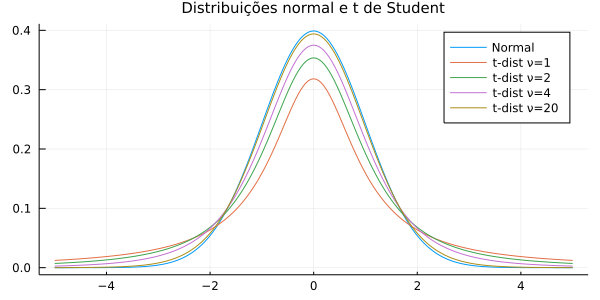

In [21]:
intervalo = -5:0.05:5
plot(intervalo, pdf.(Normal(), intervalo), label="Normal", size=(600,300),
    title="Distribuições normal e t de Student", titlefont=10)
for ν = (1, 2, 4, 20)
    plot!(intervalo, pdf.(TDist(ν), intervalo), label="t-dist ν=$ν")
end
plot!()

### O resultado de Student

* O resultado de Student vale quando a distribuição desconhecida $\mathcal{P}$ é uma normal com media $\mu$.

* Nesse caso, temos que a distribuição $\mathcal{Q}_N$ das médias $\bar q_N$ satisfaz
$$ \frac{\sqrt{\nu}}{s_N} (\mathcal{Q}_N -\mu) = t_\nu,
$$
com o grau de liberdade dado por $\nu=N-1$.

* De outra forma, temos
$$ \mathcal{Q}_N = \mu + \frac{s_N}{\sqrt{N-1}}t_{N-1}.
$$

* Quando $N\geq 3$, temos $\nu = N-1\geq 2$, de forma que $\mathcal{Q}_N$ tem média $\mu$ e variância $\nu/(\nu-2)$.

### Intervalos de confiança baseados na distribuição t

* O formato da distribuição t parece bem próximo do da normal, mas a sua cauda é um tanto mais "grossa".

* E isso é significativo, podendo alterar bastante o intervalo de confiança, que pode ser três ou quatro ou mais vezes mais largo comparado com o da normal.

* Daí a sua maior confiabilidade quando temos poucos dados.

* Para $N$ grande, a distribuição-t se aproxima da normal e as duas aproximações são essencialmente indiferentes.

### Comparando os intervalos de confiança


In [22]:
intervalos = Dict("68%" => [0.16, 0.84], "95%" => [0.025, 0.975])
for (k, int) in intervalos
    println("Normal IC $k: ", round.(quantile.(Normal(), int), digits=2))
end
println()
for ν in (1, 2, 4, 20)
    for (k, int) in intervalos
        println("T-Dist(ν=$ν) IC $k: ", round.(quantile.(TDist(ν), int), digits=2))
    end
    println()
end

Normal IC 68%: [-0.99, 0.99]
Normal IC 95%: [-1.96, 1.96]

T-Dist(ν=1) IC 68%: [-1.82, 1.82]
T-Dist(ν=1) IC 95%: [-12.71, 12.71]

T-Dist(ν=2) IC 68%: [-1.31, 1.31]
T-Dist(ν=2) IC 95%: [-4.3, 4.3]

T-Dist(ν=4) IC 68%: [-1.13, 1.13]
T-Dist(ν=4) IC 95%: [-2.78, 2.78]

T-Dist(ν=20) IC 68%: [-1.02, 1.02]
T-Dist(ν=20) IC 95%: [-2.09, 2.09]



### Visualizando os intervalos de confiança

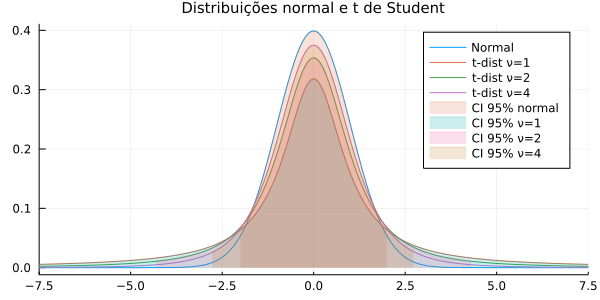

In [23]:
intervalo = -7.5:0.05:7.5
plot(intervalo, pdf.(Normal(), intervalo), label="Normal", xlims=(minimum(intervalo),maximum(intervalo)), size=(600,300),
    title="Distribuições normal e t de Student", titlefont=10)
for ν = (1, 2, 4)
    plot!(intervalo, pdf.(TDist(ν), intervalo), label="t-dist ν=$ν")
end
plot!(-2.0:0.1:2.0, x -> pdf(Normal(), x), fill=true, color=2, alpha=0.2,label="CI 95% normal")
for ν = (1, 2, 4)
    plot!(quantile(TDist(ν), 0.025):0.1:quantile(TDist(ν), 0.975), x -> pdf(TDist(ν), x), fill=true, alpha=0.2, label="CI 95% ν=$ν")
end
plot!()

## Observações finais

* Uma espécie de resumo:

* Quando temos um número razoável de dados, podemos considerar $\Delta q$ e $2\Delta q$ como os meios-comprimentos dos intervalos de $68\%$ e $95\%$ de confiança, respectivamente. Isso é feito tendo como base o Teorema do Limite Central.

* Quando temos poucos dados, o mais garantido é usar um múltiplo apropriado de $\Delta q$ dado pelos intervalos de probabilidade da distribuição t.

* Nesse último caso, também é comuma se usar $\Delta q$ e $2\Delta q$, mas explicitar que isso corresponde a outros níveis de confiança.

* Quanto à teoria, o Teorema do Limite Central vale para uma distribuição desconhecida qualquer, enquanto que o resultado de Student vale apenas no caso dessa distribuição desconhecida ser uma normal.

## Exercícios

1. Aumente e diminua o número $M$ de amostras e o número $N$ de dados em cada amostra e veja o efeito disso nos gráficos correspondentes.

1. Faça uma pesquisa sobre as demonstrações do Teorema do Limite Central e do resultado de Student.

<!--NAVIGATOR-->

---
[<- 5. Erros, incertezas](05.00-Erros_incertezas_quantificacao.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) | [5.2. Mínimos quadrados, maximização da verossimilhança e quantificação de incertezas em regressões lineares ->](05.02-Minimos_quadrados_verossimilhanca.ipynb)